<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/books_sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

from sklearn.metrics import mean_squared_error

In [3]:
books = pd.read_csv('/content/drive/MyDrive/Label_Master Forecasting Datasets/Books_ext_fs.csv')
sales = books[['Year_Month','Sum of Sales']]
sales

,Year_Month,Sum of Sales
0,2008-01,282604.11
1,2008-02,262474.40
2,2008-03,326059.68
3,2008-04,215387.49
4,2008-05,499559.90
...,...,...
150,2020-07,150348.10
151,2020-08,156066.95
152,2020-09,468710.96
153,2020-10,1118446.80


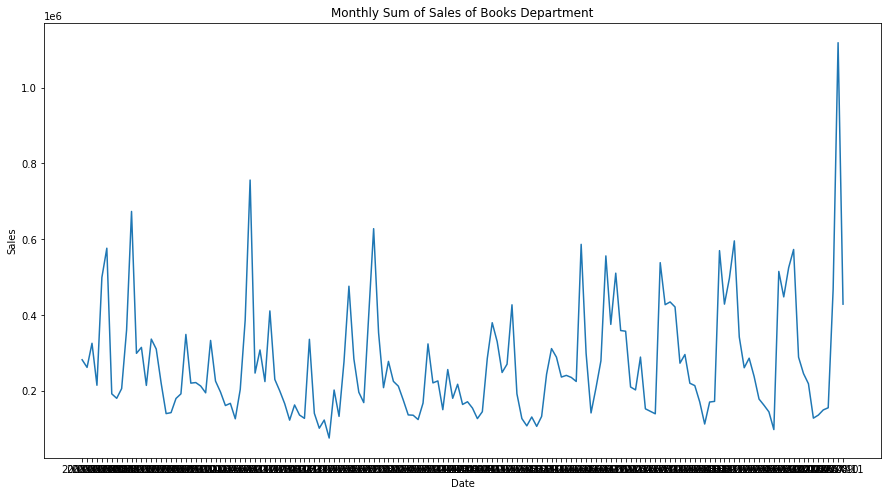

In [4]:
plt.figure(figsize=[15,8])
plt.plot(sales['Year_Month'],sales['Sum of Sales'])
plt.title('Monthly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [5]:
ad_fuller_result = adfuller(sales['Sum of Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.5489088668534055
p-value: 0.10402307648031173


Since the p-value is greater than 0.5, we cannot reject null hypothesis and must assume that the series is not stationary.

In [6]:
sales['sales_diffed'] = sales['Sum of Sales'].diff(1)
sales

,Year_Month,Sum of Sales,sales_diffed
0,2008-01,282604.11,NaN
1,2008-02,262474.40,-20129.71
2,2008-03,326059.68,63585.28
3,2008-04,215387.49,-110672.19
4,2008-05,499559.90,284172.41
...,...,...,...
150,2020-07,150348.10,13635.82
151,2020-08,156066.95,5718.85
152,2020-09,468710.96,312644.01
153,2020-10,1118446.80,649735.84


In [7]:
ad_fuller_result = adfuller(sales['sales_diffed'][1:])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.799805714064923
p-value: 4.6595513291859336e-07


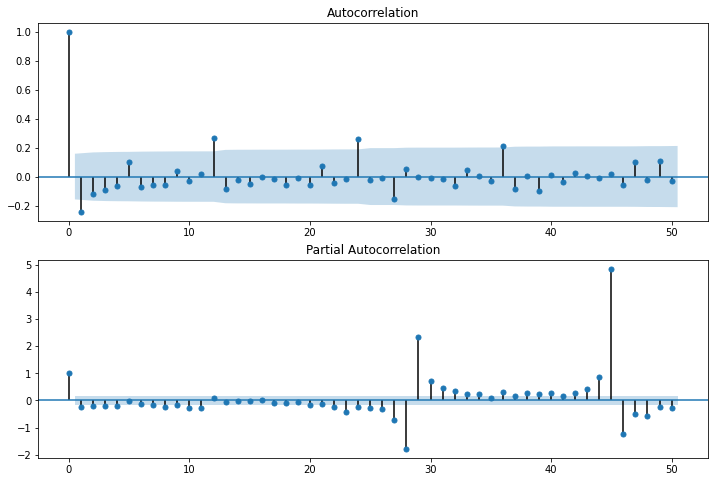

In [8]:

fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(sales['sales_diffed'][1:], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(sales['sales_diffed'][1:], lags=50, ax=ax[1])
plt.show()

# New Section

In [9]:
p = range(0,4)
d = range(1,2)
q = range(0,4)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 1, 0)x(0, 1, 0, 12)- AIC:3803.316495554425
 
ARIMA(0, 1, 0)x(0, 1, 1, 12)- AIC:3437.4592235190935
 
ARIMA(0, 1, 0)x(0, 1, 2, 12)- AIC:3116.9000393268852
 
ARIMA(0, 1, 0)x(0, 1, 3, 12)- AIC:9176.444692384823
 
ARIMA(0, 1, 0)x(1, 1, 0, 12)- AIC:3467.1424715537514
 
ARIMA(0, 1, 0)x(1, 1, 1, 12)- AIC:3437.3214744033567
 
ARIMA(0, 1, 0)x(1, 1, 2, 12)- AIC:3115.880655983203
 
ARIMA(0, 1, 0)x(1, 1, 3, 12)- AIC:9232.645100155976
 
ARIMA(0, 1, 0)x(2, 1, 0, 12)- AIC:3136.0807394814906
 
ARIMA(0, 1, 0)x(2, 1, 1, 12)- AIC:3137.139941690114
 
ARIMA(0, 1, 0)x(2, 1, 2, 12)- AIC:3114.5811730362752
 
ARIMA(0, 1, 0)x(2, 1, 3, 12)- AIC:9221.286613194332
 
ARIMA(0, 1, 0)x(3, 1, 0, 12)- AIC:2824.5916440084284
 
ARIMA(0, 1, 0)x(3, 1, 1, 12)- AIC:2826.4042538184303
 
ARIMA(0, 1, 0)x(3, 1, 2, 12)- AIC:2825.523819485029
 
ARIMA(0, 1, 0)x(3, 1, 3, 12)- AIC:9124.760886962367
 
ARIMA(0, 1, 1)x(0, 1, 0, 12)- AIC:3746.972151549719
 
ARIMA(0, 1, 1)x(0, 1, 1, 12)- AIC:3389.78807782853
 
ARIMA(0, 1, 1)x(0, 1,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 3)x(3, 1, 2, 12)- AIC:2805.3301326463456
 
ARIMA(0, 1, 3)x(3, 1, 3, 12)- AIC:8889.178268265463
 
ARIMA(1, 1, 0)x(0, 1, 0, 12)- AIC:3787.7805336705555
 
ARIMA(1, 1, 0)x(0, 1, 1, 12)- AIC:3429.932372884067
 
ARIMA(1, 1, 0)x(0, 1, 2, 12)- AIC:3111.046675183233
 
ARIMA(1, 1, 0)x(0, 1, 3, 12)- AIC:9202.393659103143
 
ARIMA(1, 1, 0)x(1, 1, 0, 12)- AIC:3432.2846079175397
 
ARIMA(1, 1, 0)x(1, 1, 1, 12)- AIC:3430.959453780746
 
ARIMA(1, 1, 0)x(1, 1, 2, 12)- AIC:3112.7749590950075
 
ARIMA(1, 1, 0)x(1, 1, 3, 12)- AIC:9258.855459466491
 
ARIMA(1, 1, 0)x(2, 1, 0, 12)- AIC:3110.7107218685383
 
ARIMA(1, 1, 0)x(2, 1, 1, 12)- AIC:3112.6873263780144
 
ARIMA(1, 1, 0)x(2, 1, 2, 12)- AIC:3114.5235007716324
 
ARIMA(1, 1, 0)x(2, 1, 3, 12)- AIC:9241.701366859692
 
ARIMA(1, 1, 0)x(3, 1, 0, 12)- AIC:2798.6705239053595
 
ARIMA(1, 1, 0)x(3, 1, 1, 12)- AIC:2800.648427204992
 
ARIMA(1, 1, 0)x(3, 1, 2, 12)- AIC:2801.414287817363
 
ARIMA(1, 1, 0)x(3, 1, 3, 12)- AIC:9165.331691791203
 
ARIMA(1, 1, 1)x(0, 1

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(2, 1, 2, 12)- AIC:3039.643388199011
 
ARIMA(1, 1, 2)x(2, 1, 3, 12)- AIC:9054.09578871789
 
ARIMA(1, 1, 2)x(3, 1, 0, 12)- AIC:2780.124454657759
 
ARIMA(1, 1, 2)x(3, 1, 1, 12)- AIC:2780.6594185604326
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 2)x(3, 1, 2, 12)- AIC:2780.635164063448
 
ARIMA(1, 1, 2)x(3, 1, 3, 12)- AIC:8979.218869364977
 
ARIMA(1, 1, 3)x(0, 1, 0, 12)- AIC:3689.3395847695783
 
ARIMA(1, 1, 3)x(0, 1, 1, 12)- AIC:3334.2665528212865
 
ARIMA(1, 1, 3)x(0, 1, 2, 12)- AIC:3016.932380590452
 
ARIMA(1, 1, 3)x(0, 1, 3, 12)- AIC:8926.942602548239
 
ARIMA(1, 1, 3)x(1, 1, 0, 12)- AIC:3411.8256041347463
 
ARIMA(1, 1, 3)x(1, 1, 1, 12)- AIC:3332.76843138128
 
ARIMA(1, 1, 3)x(1, 1, 2, 12)- AIC:3018.778729811552
 
ARIMA(1, 1, 3)x(1, 1, 3, 12)- AIC:8981.848351472638
 
ARIMA(1, 1, 3)x(2, 1, 0, 12)- AIC:3094.2551234495363
 
ARIMA(1, 1, 3)x(2, 1, 1, 12)- AIC:3096.2541596025735
 
ARIMA(1, 1, 3)x(2, 1, 2, 12)- AIC:3020.2986069904377
 
ARIMA(1, 1, 3)x(2, 1, 3, 12)- AIC:8965.241518654608
 
ARIMA(1, 1, 3)x(3, 1, 0, 12)- AIC:2781.052074831293
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 1, 12)- AIC:2773.749930578765
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x(3, 1, 2, 12)- AIC:2773.834804637361
 
ARIMA(1, 1, 3)x(3, 1, 3, 12)- AIC:8891.110977159506
 
ARIMA(2, 1, 0)x(0, 1, 0, 12)- AIC:3755.8083850738913
 
ARIMA(2, 1, 0)x(0, 1, 1, 12)- AIC:3423.930538063627
 
ARIMA(2, 1, 0)x(0, 1, 2, 12)- AIC:3105.181711178416
 
ARIMA(2, 1, 0)x(0, 1, 3, 12)- AIC:9199.04103985602
 
ARIMA(2, 1, 0)x(1, 1, 0, 12)- AIC:3400.1442945396907
 
ARIMA(2, 1, 0)x(1, 1, 1, 12)- AIC:3398.7743717631274
 
ARIMA(2, 1, 0)x(1, 1, 2, 12)- AIC:3107.112207335911
 
ARIMA(2, 1, 0)x(1, 1, 3, 12)- AIC:9255.502840219367
 
ARIMA(2, 1, 0)x(2, 1, 0, 12)- AIC:3079.0217076737863
 
ARIMA(2, 1, 0)x(2, 1, 1, 12)- AIC:3081.0200871979755
 
ARIMA(2, 1, 0)x(2, 1, 2, 12)- AIC:3082.8373594072445
 
ARIMA(2, 1, 0)x(2, 1, 3, 12)- AIC:9238.348747612568
 
ARIMA(2, 1, 0)x(3, 1, 0, 12)- AIC:2766.442666129098
 
ARIMA(2, 1, 0)x(3, 1, 1, 12)- AIC:2768.437164764686
 
ARIMA(2, 1, 0)x(3, 1, 2, 12)- AIC:2770.455782422442
 
ARIMA(2, 1, 0)x(3, 1, 3, 12)- AIC:9074.89355756747
 
ARIMA(2, 1, 1)x(0, 1, 0,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 1, 12)- AIC:2746.4482893461973
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(3, 1, 2, 12)- AIC:2752.623764401096
 
ARIMA(2, 1, 2)x(3, 1, 3, 12)- AIC:8980.754099307424
 
ARIMA(2, 1, 3)x(0, 1, 0, 12)- AIC:3683.1756772046347
 
ARIMA(2, 1, 3)x(0, 1, 1, 12)- AIC:3335.0266424224624
 
ARIMA(2, 1, 3)x(0, 1, 2, 12)- AIC:3016.6807569290304
 
ARIMA(2, 1, 3)x(0, 1, 3, 12)- AIC:8925.649492414343
 
ARIMA(2, 1, 3)x(1, 1, 0, 12)- AIC:3386.9141865621154
 
ARIMA(2, 1, 3)x(1, 1, 1, 12)- AIC:3333.31624427363
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(1, 1, 2, 12)- AIC:3018.6094974067105
 
ARIMA(2, 1, 3)x(1, 1, 3, 12)- AIC:8980.555241338747
 
ARIMA(2, 1, 3)x(2, 1, 0, 12)- AIC:3068.381514939279
 
ARIMA(2, 1, 3)x(2, 1, 1, 12)- AIC:3070.3813845834934
 
ARIMA(2, 1, 3)x(2, 1, 2, 12)- AIC:3020.0981892829686
 
ARIMA(2, 1, 3)x(2, 1, 3, 12)- AIC:8963.948408520706
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 0, 12)- AIC:2751.2594705609467
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 1, 12)- AIC:2748.7680680608664
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3)x(3, 1, 2, 12)- AIC:2755.3879040127395
 
ARIMA(2, 1, 3)x(3, 1, 3, 12)- AIC:8889.817867025604
 
ARIMA(3, 1, 0)x(0, 1, 0, 12)- AIC:3723.2905296824692
 
ARIMA(3, 1, 0)x(0, 1, 1, 12)- AIC:3419.7380738139022
 
ARIMA(3, 1, 0)x(0, 1, 2, 12)- AIC:3102.1927903853502
 
ARIMA(3, 1, 0)x(0, 1, 3, 12)- AIC:9195.19917994743
 
ARIMA(3, 1, 0)x(1, 1, 0, 12)- AIC:3369.700169938483
 
ARIMA(3, 1, 0)x(1, 1, 1, 12)- AIC:3368.5352465983783
 
ARIMA(3, 1, 0)x(1, 1, 2, 12)- AIC:3104.2342898960533
 
ARIMA(3, 1, 0)x(1, 1, 3, 12)- AIC:9251.660980310779
 
ARIMA(3, 1, 0)x(2, 1, 0, 12)- AIC:3049.740223518011
 
ARIMA(3, 1, 0)x(2, 1, 1, 12)- AIC:3051.674907307279
 
ARIMA(3, 1, 0)x(2, 1, 2, 12)- AIC:3053.6364813418977
 
ARIMA(3, 1, 0)x(2, 1, 3, 12)- AIC:9234.506887703985
 
ARIMA(3, 1, 0)x(3, 1, 0, 12)- AIC:2736.999014107326
 
ARIMA(3, 1, 0)x(3, 1, 1, 12)- AIC:2738.991948982497
 
ARIMA(3, 1, 0)x(3, 1, 2, 12)- AIC:2738.3894166024247
 
ARIMA(3, 1, 0)x(3, 1, 3, 12)- AIC:8984.077456204344
 
ARIMA(3, 1, 1)x(0, 1,

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 0, 12)- AIC:2726.7444926568387
 
ARIMA(3, 1, 2)x(3, 1, 1, 12)- AIC:2727.0939365627646
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2)x(3, 1, 2, 12)- AIC:2730.117681449133
 
ARIMA(3, 1, 2)x(3, 1, 3, 12)- AIC:8980.450370942344
 
ARIMA(3, 1, 3)x(0, 1, 0, 12)- AIC:3685.152850822561
 
ARIMA(3, 1, 3)x(0, 1, 1, 12)- AIC:3330.4051994891784
 
ARIMA(3, 1, 3)x(0, 1, 2, 12)- AIC:3016.639237698663
 
ARIMA(3, 1, 3)x(0, 1, 3, 12)- AIC:8927.633413190271
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 0, 12)- AIC:3350.880764544884
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 1, 12)- AIC:3324.7588373352364
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(1, 1, 2, 12)- AIC:3017.644113124888
 
ARIMA(3, 1, 3)x(1, 1, 3, 12)- AIC:8982.539162114674
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 0, 12)- AIC:3038.0640870646143
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 1, 12)- AIC:3039.8224160072805
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(2, 1, 2, 12)- AIC:3016.4903559655554
 
ARIMA(3, 1, 3)x(2, 1, 3, 12)- AIC:8965.932329296633
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 0, 12)- AIC:2722.5867828193955
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 1, 12)- AIC:2726.3730698779245
 


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 3)x(3, 1, 2, 12)- AIC:2729.2927326134245
 
ARIMA(3, 1, 3)x(3, 1, 3, 12)- AIC:8891.80178780153
 


In [11]:
df = df.sort_values('AIC').reset_index(drop= True)
df

,param,param_seasonal,AIC
0,"(3, 1, 3)","(3, 1, 0, 12)",2722.586783
1,"(3, 1, 3)","(3, 1, 1, 12)",2726.373070
2,"(3, 1, 2)","(3, 1, 0, 12)",2726.744493
3,"(3, 1, 2)","(3, 1, 1, 12)",2727.093937
4,"(3, 1, 1)","(3, 1, 1, 12)",2727.271205
...,...,...,...
251,"(2, 1, 0)","(2, 1, 3, 12)",9238.348748
252,"(1, 1, 0)","(2, 1, 3, 12)",9241.701367
253,"(3, 1, 0)","(1, 1, 3, 12)",9251.660980
254,"(2, 1, 0)","(1, 1, 3, 12)",9255.502840


The above output suggests that SARIMAX(3,1,3)(3,1,0,12) yields the lowest AIC value of 2272.586783. Therefore we should consider this to be the optimal option.

In [12]:
mod = sm.tsa.statespace.SARIMAX(sales['Sum of Sales'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 1, 0, 12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  155
Model:             SARIMAX(3, 1, 3)x(3, 1, 0, 12)   Log Likelihood               -1870.725
Date:                            Thu, 04 Mar 2021   AIC                           3761.450
Time:                                    03:02:31   BIC                           3791.008
Sample:                                         0   HQIC                          3773.461
                                            - 155                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6346      0.191      3.327      0.001       0.261       1.008
ar.L2         -1.0588      0.125   

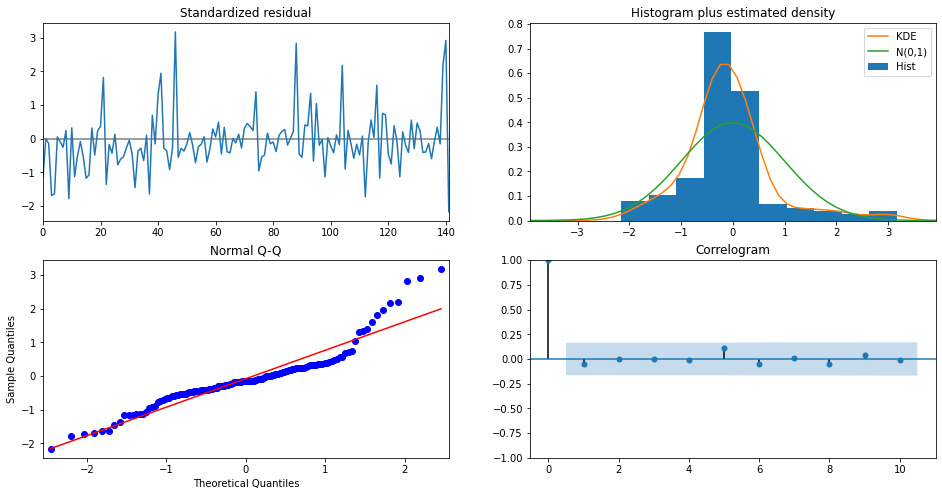

In [13]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

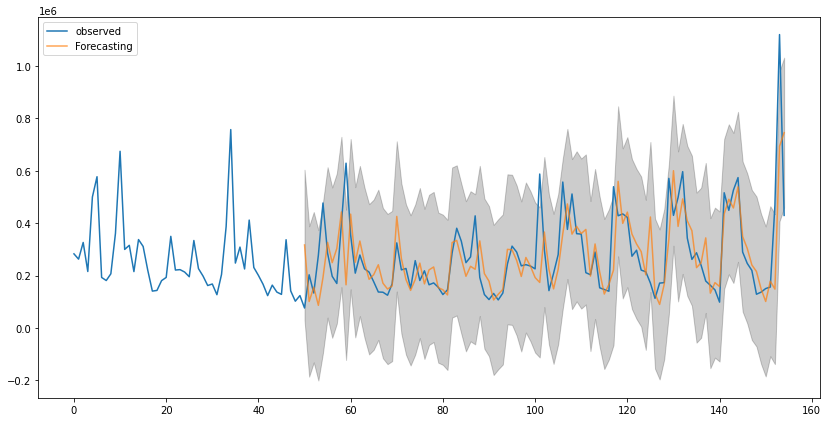

In [18]:
pred = results.get_prediction(start=50, dynamic=False)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecasting', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()